In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow


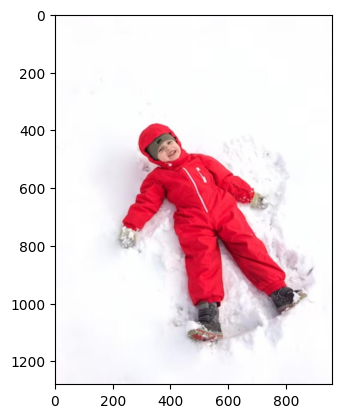

In [ ]:
image = mpl.image.imread("dog.jpeg")
plt.imshow(image)

In [ ]:
image.shape

(1280, 960, 3)

In [ ]:
X=image.reshape(-1,3)

In [ ]:
X.shape

(1228800, 3)

In [ ]:
kmeans=KMeans(n_clusters=2)

In [ ]:
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
segmented_image=kmeans.cluster_centers_[kmeans.labels_]
segmented_image=segmented_image.reshape(image.shape)

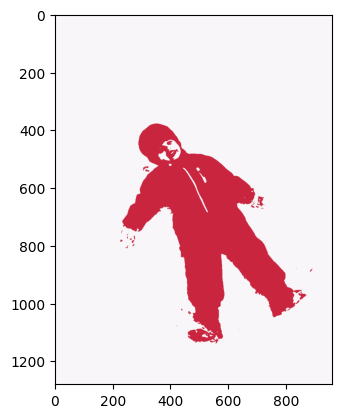

In [ ]:
plt.imshow(segmented_image/255)

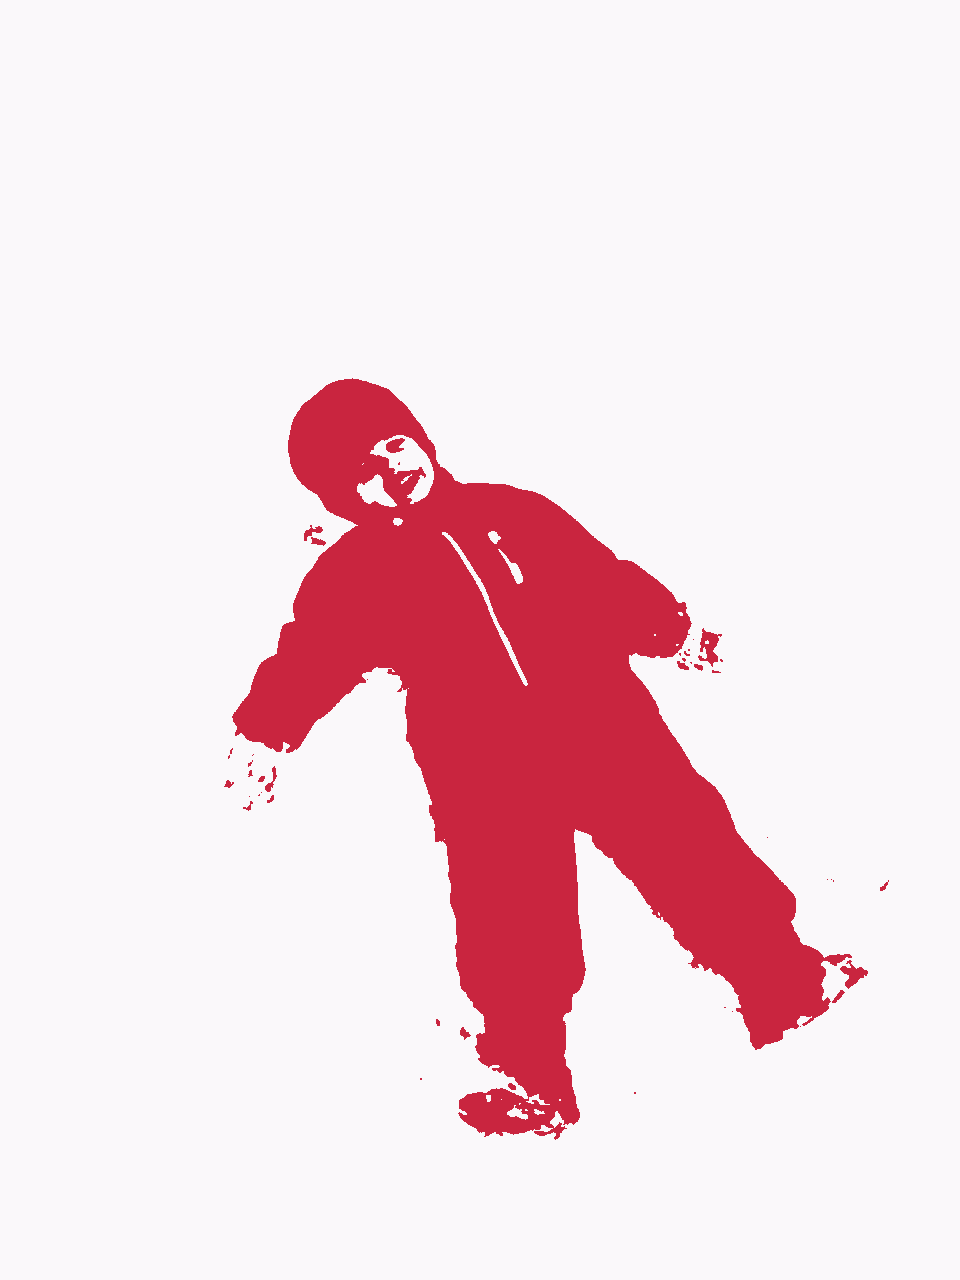

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab

# Load the image
image = cv2.imread("dog.jpeg")

# Reshape the image to a 2D array of pixels (each row is a pixel, and each column is a channel)
pixels = image.reshape((-1, 3))

# Convert the pixel values to float
pixels = np.float32(pixels)

# Define the number of clusters (segments) you want to create
num_clusters = 2

# Define criteria (the maximum number of iterations and the epsilon value)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Perform K-means clustering
_, labels, centers = cv2.kmeans(pixels, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the center values back to 8-bit integers
centers = np.uint8(centers)

# Map each pixel to its corresponding center
segmented_image = centers[labels.flatten()]

# Reshape the segmented image to the original dimensions
segmented_image = segmented_image.reshape(image.shape)

# Display the segmented image using cv2_imshow
cv2_imshow(segmented_image)


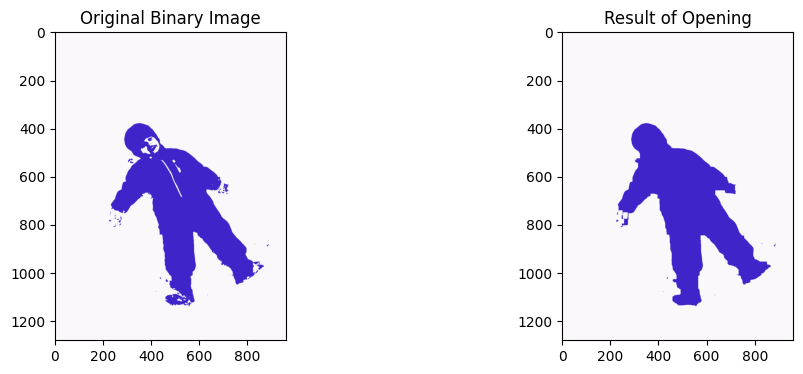

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the binary image (thresholded image)
binary_image = segmented_image

# Define a kernel for the opening operation (structuring element)
kernel = np.ones((19, 19), np.uint8)  # You can adjust the kernel size as needed

# Perform morphological opening
opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# Display the original binary image and the result of the opening operation
plt.figure(figsize=(12, 4))
plt.subplot(121), plt.imshow(binary_image, cmap='gray'), plt.title('Original Binary Image')
plt.subplot(122), plt.imshow(opened_image, cmap='gray'), plt.title('Result of Opening')
plt.show()


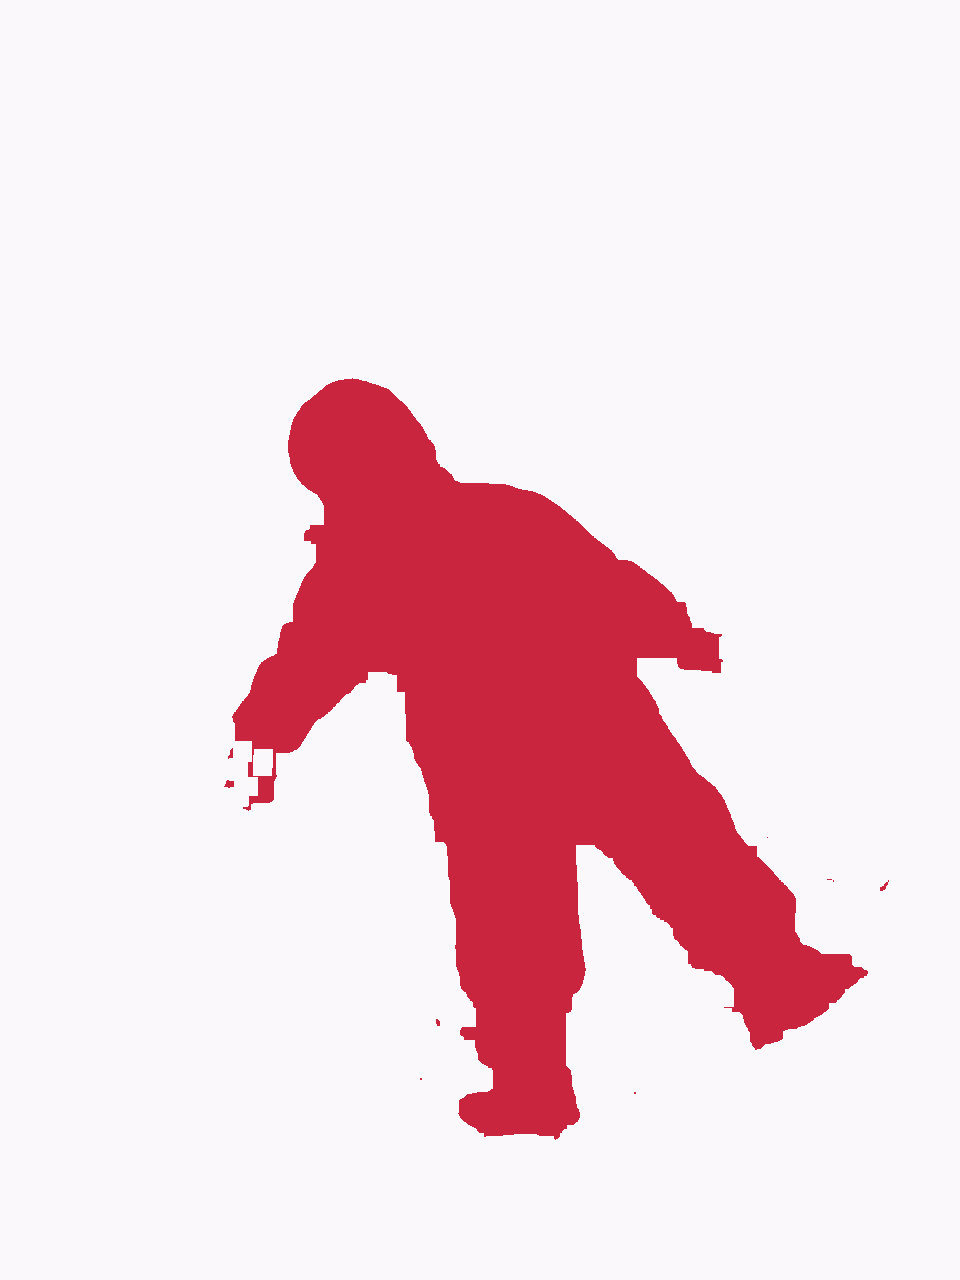

In [ ]:
cv2_imshow(opened_image)

In [ ]:
np.unique(opened_image)

array([ 37,  63, 201, 248, 250], dtype=uint8)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


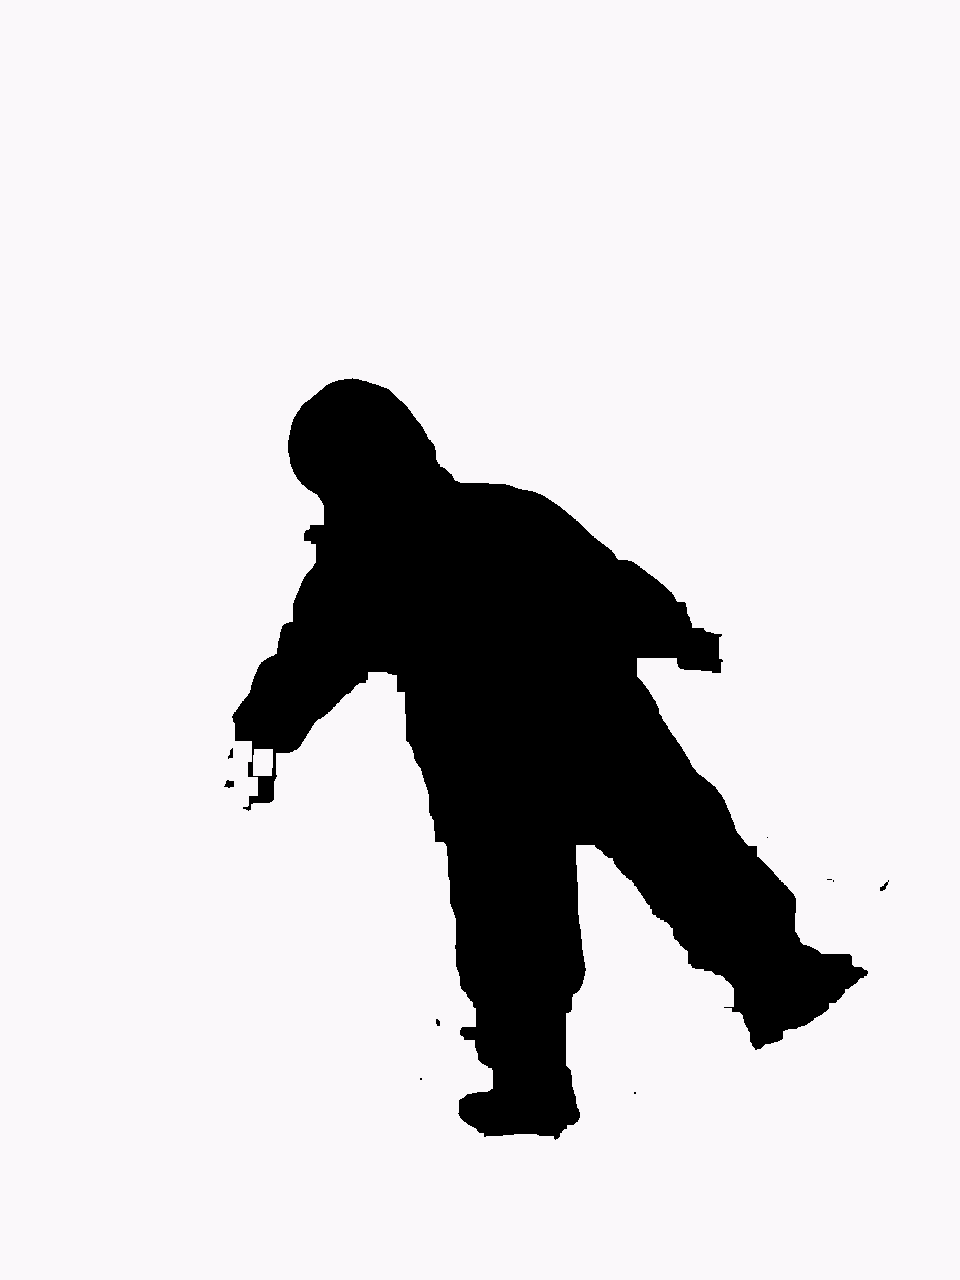

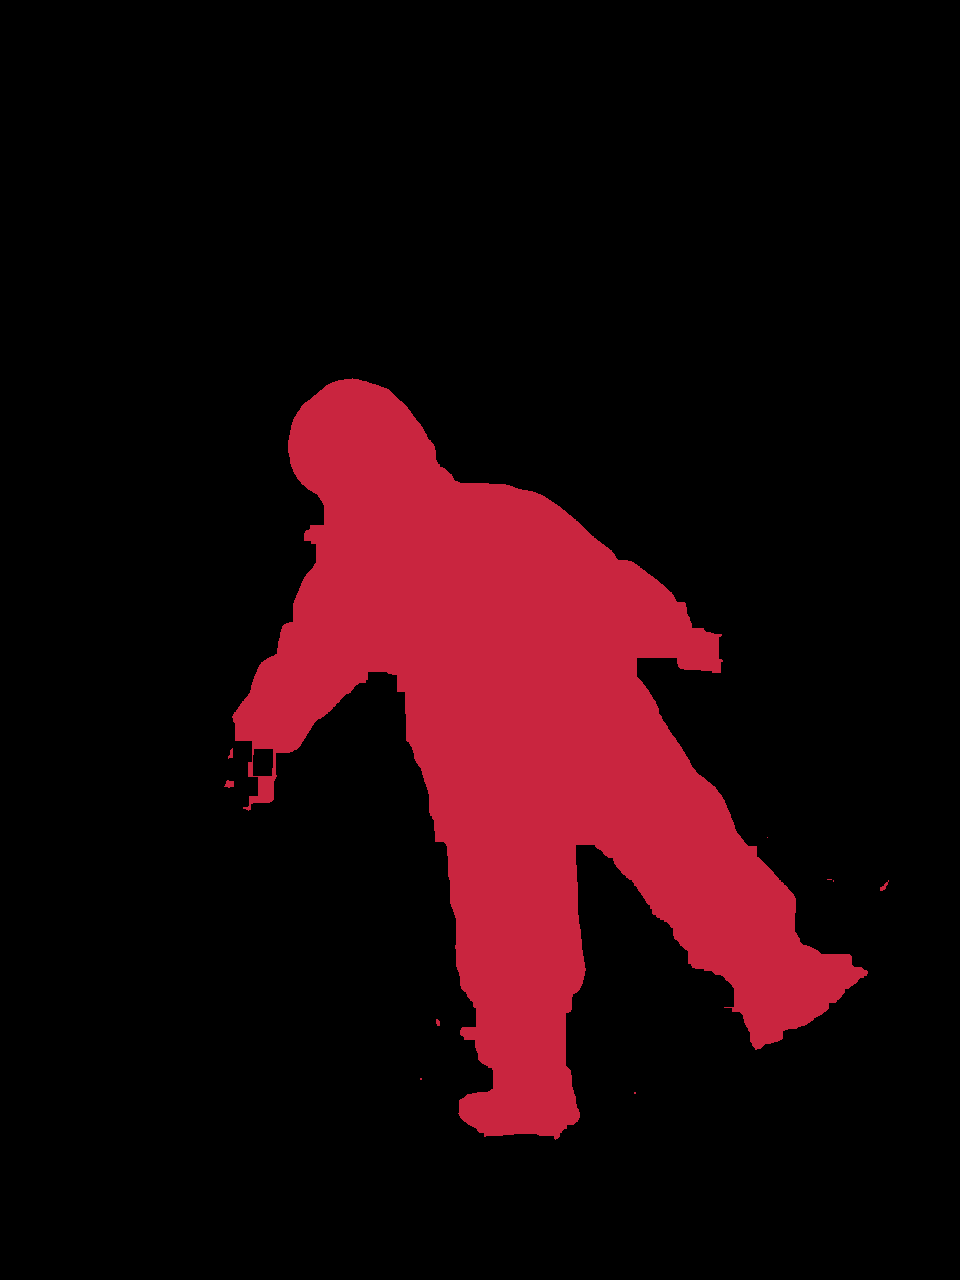

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

# Load the image
#image = cv2.imread('your_image.jpg')

# Convert the image to 1D array of pixels
pixels = opened_image.reshape(-1, 3)

# Define the number of clusters (2 for foreground and background)
num_clusters = 2

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(pixels)

# Get the cluster assignments for each pixel
cluster_assignments = kmeans.labels_

# Reshape the cluster assignments back to the original image shape
cluster_assignments = cluster_assignments.reshape(opened_image.shape[:2])

# Create masks for the foreground and background
foreground_mask = (cluster_assignments == 0).astype(np.uint8)
background_mask = (cluster_assignments == 1).astype(np.uint8)

# Ensure the masks are in the same size as the original image
foreground_mask = cv2.resize(foreground_mask, (opened_image.shape[1], image.shape[0]))
background_mask = cv2.resize(background_mask, (opened_image.shape[1], image.shape[0]))

# Apply the masks to the original image
foreground_image = cv2.bitwise_and(opened_image, opened_image, mask=foreground_mask)
background_image = cv2.bitwise_and(opened_image, opened_image, mask=background_mask)

# Display or save the resulting foreground and background images
cv2_imshow(foreground_image)
cv2_imshow(background_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

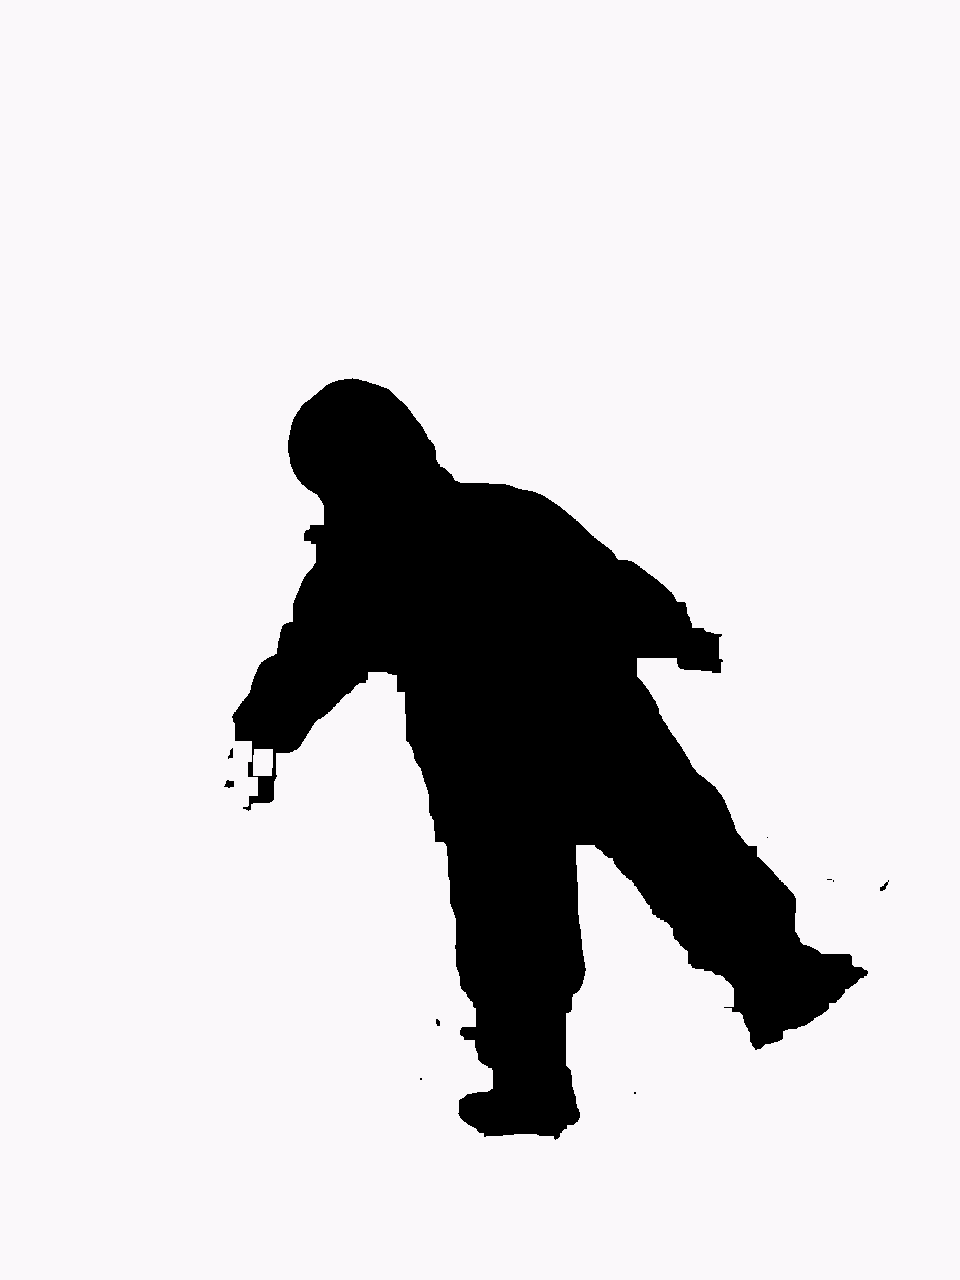

In [ ]:
cv2_imshow(foreground_image)

In [ ]:
np.unique(foreground_image)

array([  0, 248, 250], dtype=uint8)

In [ ]:
gray_result_image = cv2.cvtColor(foreground_image, cv2.COLOR_BGR2GRAY)


In [ ]:
np.unique(gray_result_image)

array([  0, 249], dtype=uint8)

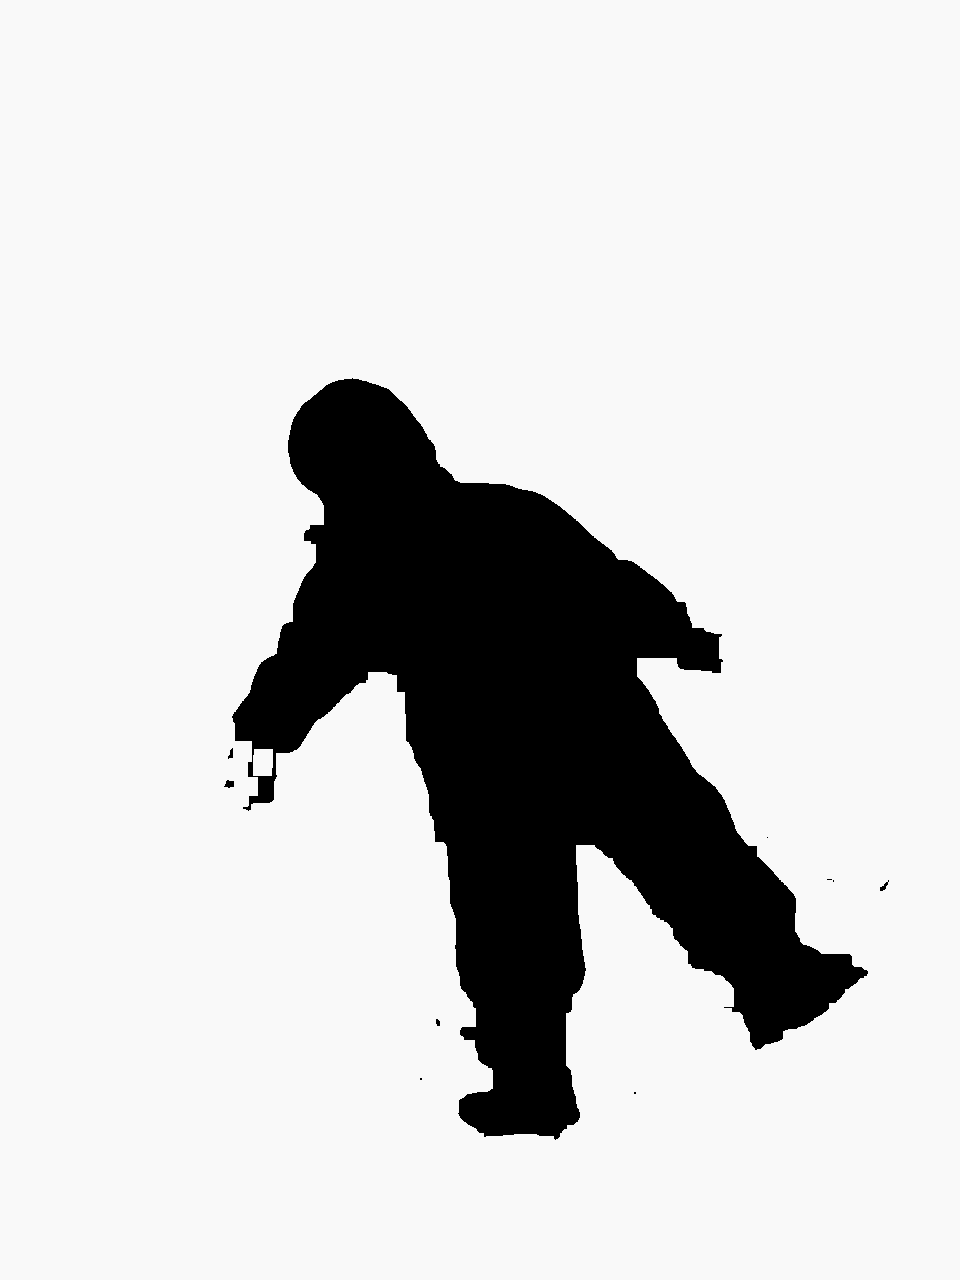

In [ ]:
cv2_imshow(gray_result_image)

In [ ]:
actual_image=gray_result_image
actual_image = np.where(actual_image == 249, 128, actual_image)
actual_image = np.where(actual_image == 0, 249, actual_image)

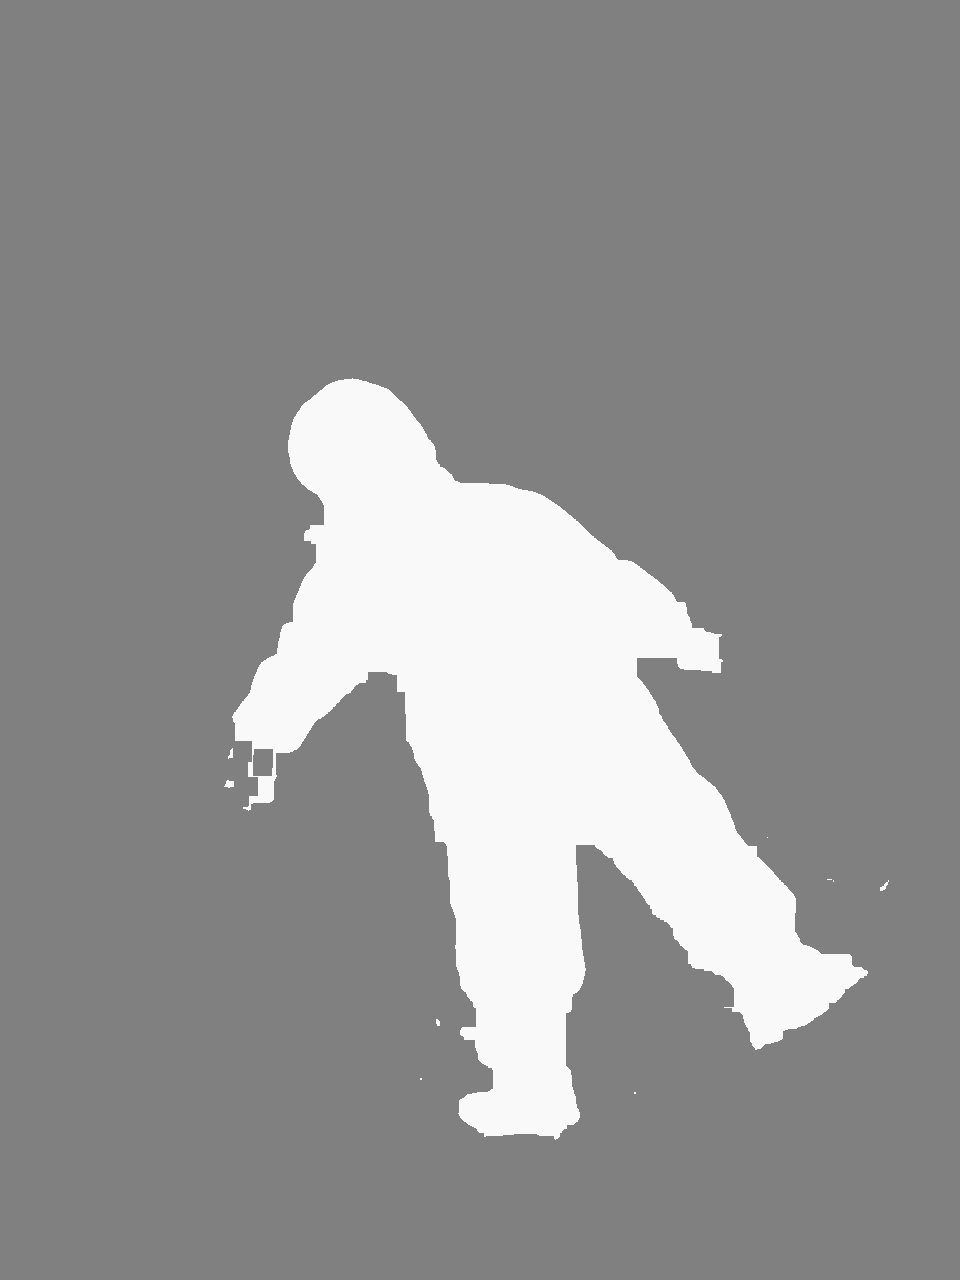

In [ ]:
cv2_imshow(actual_image)

In [ ]:
np.unique(actual_image)

array([128, 249], dtype=uint8)

In [ ]:
actual_image.shape

(1280, 960)

In [ ]:
"One of the approaches for shadow"

'One of the approaches for shadow'

In [ ]:
import cv2
import numpy as np

# Load the grayscale image
image = np.array(actual_image)  # Make sure 'actual_image' contains your grayscale image

# Define the pixel value for gray and black
gray_value = 249
black_value = 0
num_black_pixels = 50  # Number of black pixels to add

# Process each row in the image
for row in image:
    last_gray_pixel_index = -1

    # Find the index of the last gray pixel in the row
    for i, pixel_value in enumerate(row):
        if pixel_value == gray_value:
            last_gray_pixel_index = i

    # Add 50 black pixels after the last occurrence of 249
    if last_gray_pixel_index >= 0 and last_gray_pixel_index + num_black_pixels < len(row):
        row[last_gray_pixel_index + 1:last_gray_pixel_index + 1 + num_black_pixels] = black_value

# Save the modified image
cv2.imwrite('output_image.jpg', image)


True

In [ ]:
shadow_image=np.where(actual_image == 249, 0, actual_image)

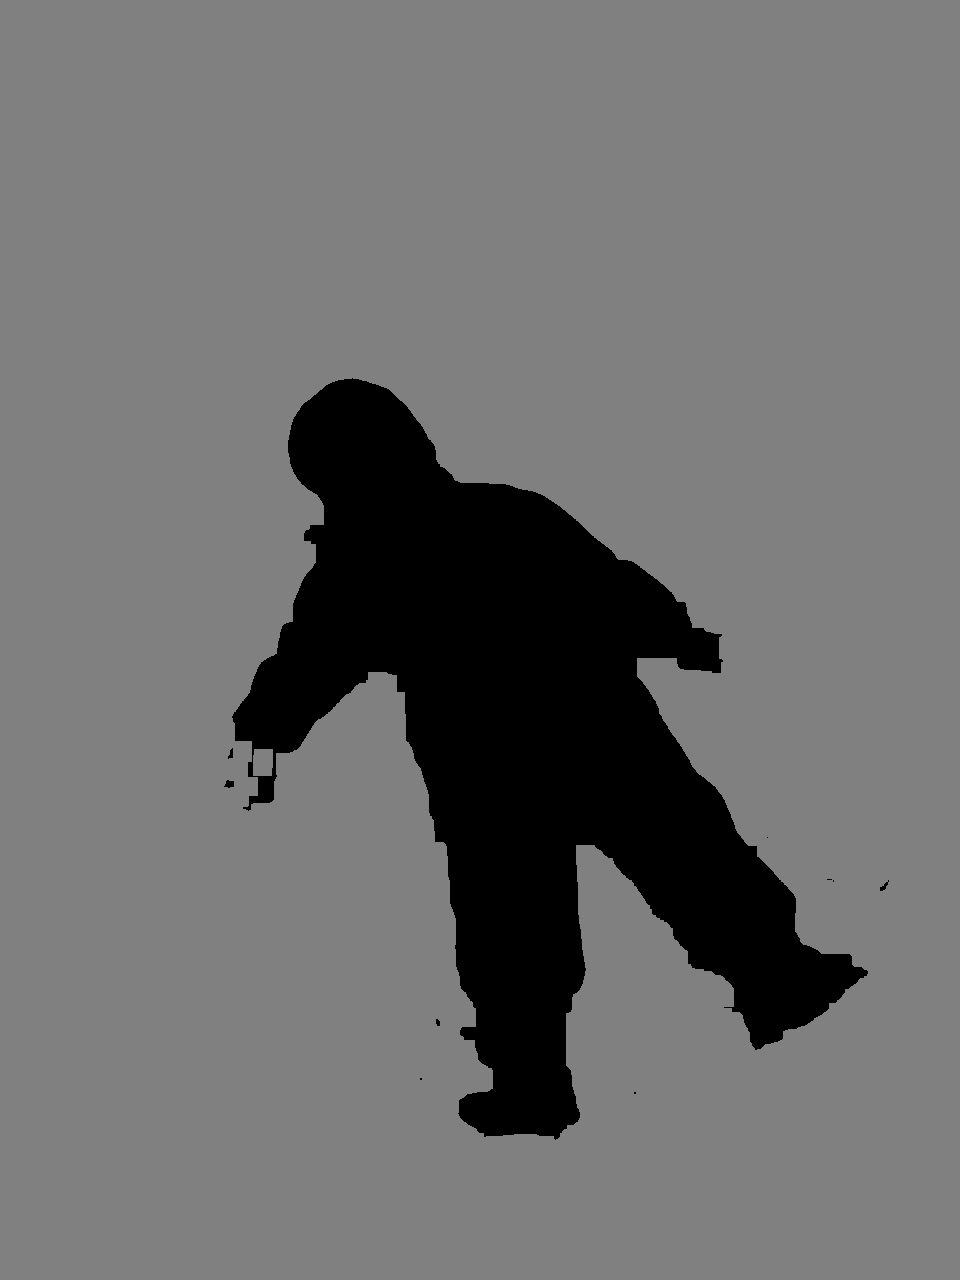

In [ ]:
cv2_imshow(shadow_image)

In [ ]:
np.unique(shadow_image)

array([  0, 128], dtype=uint8)

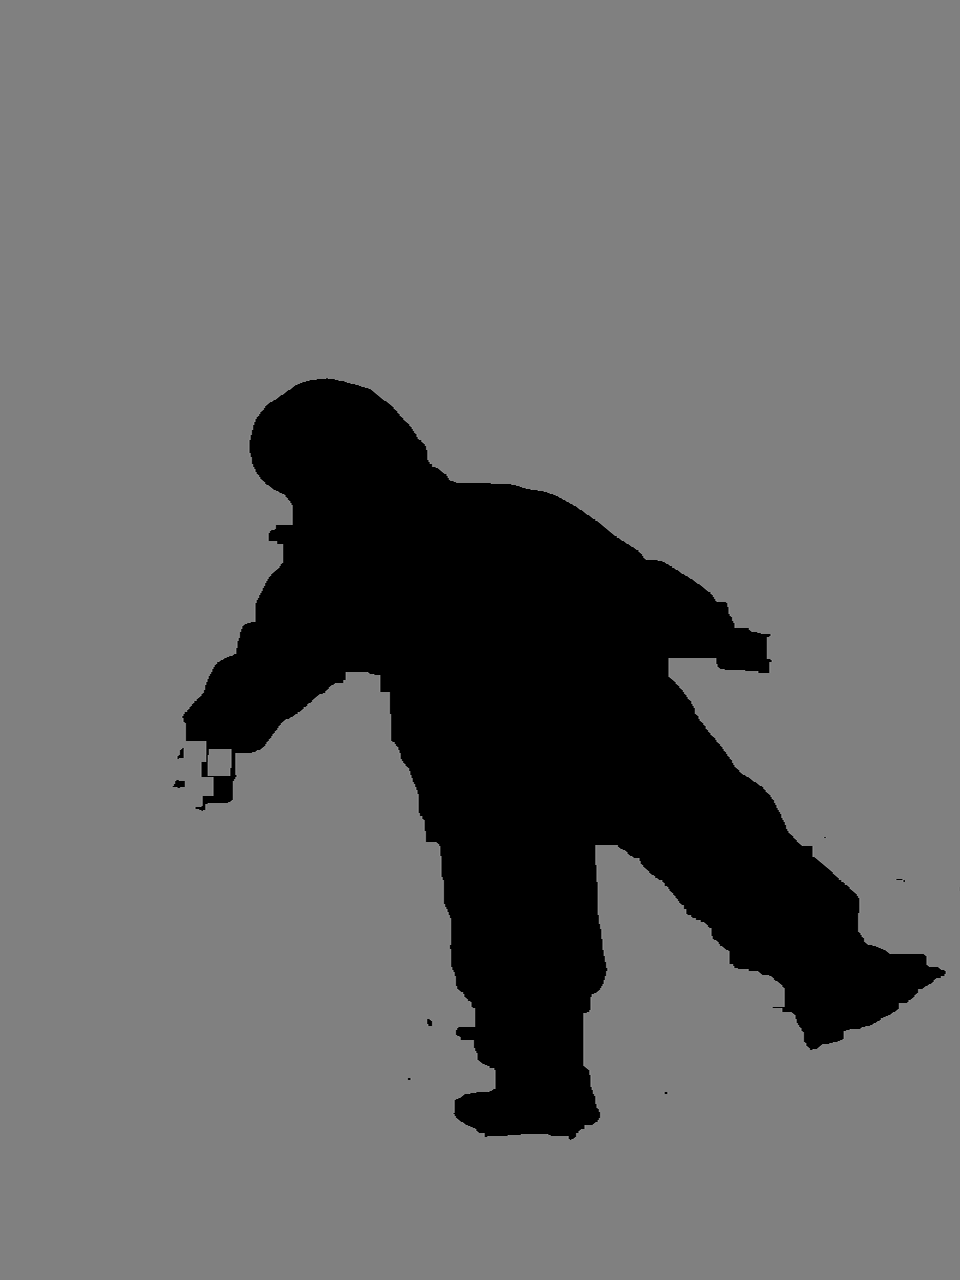

In [ ]:
import cv2

# Load your image
image = shadow_image

# Get the original dimensions of the image
original_height, original_width= image.shape

# Define the scaling factors
scale_x = 1.2
scale_y = 1.0  # Maintain the same height

# Resize the image while maintaining the aspect ratio
scaled_image = cv2.resize(image, None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_CUBIC)

# Get the new dimensions
new_height, new_width = scaled_image.shape

# Calculate the amount to crop from both sides
crop_pixels = int((new_width - original_width) / 2)

# Crop the scaled image to maintain the original size
cropped_image = scaled_image[:, crop_pixels:crop_pixels + original_width]

# Display or save the scaled and cropped image
cv2_imshow(cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
np.unique(cropped_image)

array([  0,   2,   9,  16,  29,  38,  52,  66,  76,  94,  99, 119, 128,
       129, 132, 135, 138, 142], dtype=uint8)

In [ ]:
cropped_image.shape

(1280, 960)

In [ ]:
shadow_image=cropped_image

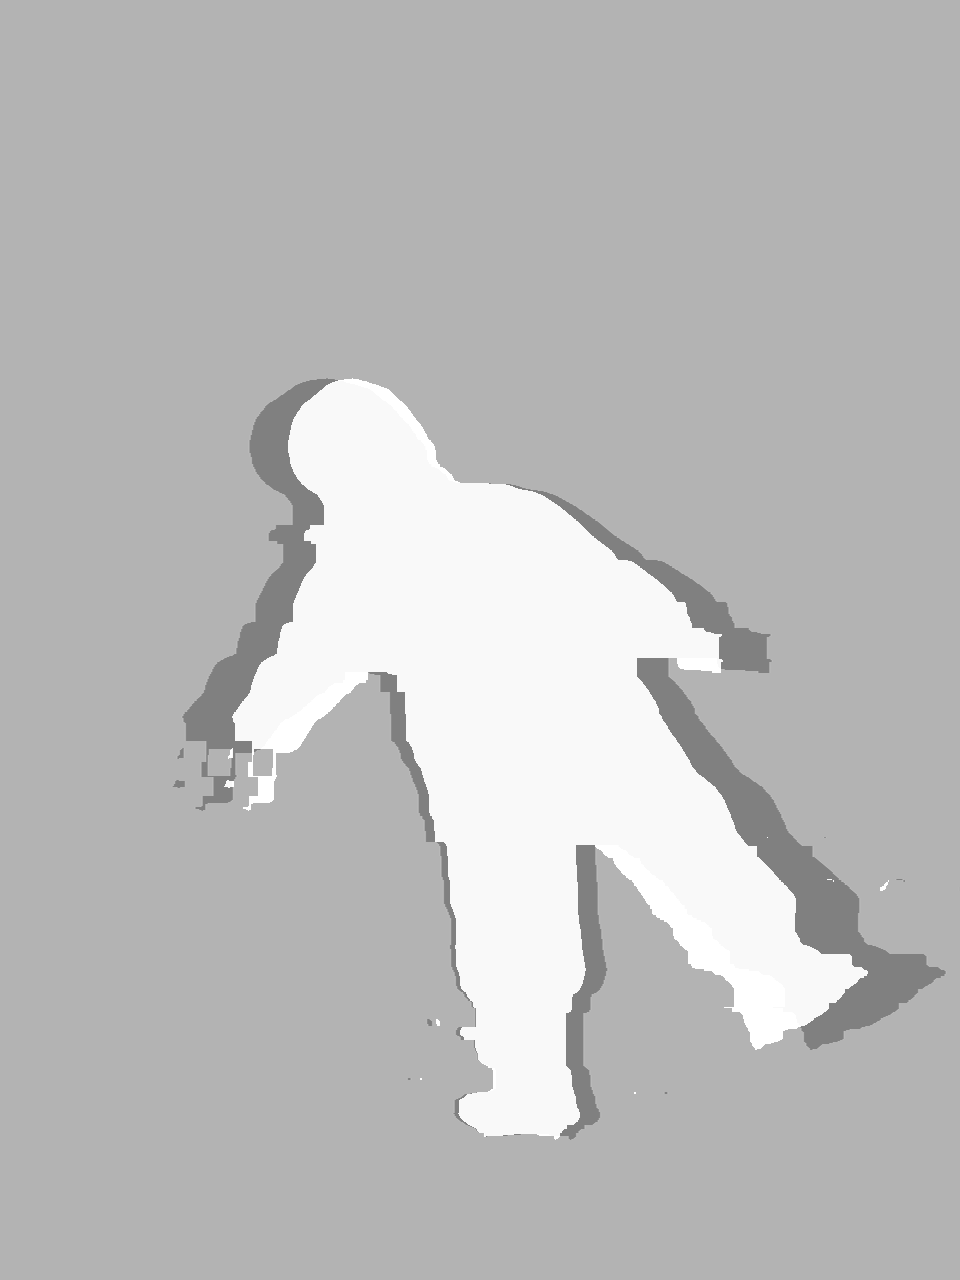

In [ ]:
import cv2

# Load the expanded image
expanded_image = shadow_image

# Load the binary thresholded target object image (from the previous processing steps)
target_object_image = actual_image

# Ensure both images have the same dimensions
target_object_image = cv2.resize(target_object_image, (expanded_image.shape[1], expanded_image.shape[0]))

# Apply a blending or overlay operation to fuse the two images
alpha = 0.8 # Adjust the alpha value to control the blending intensity
fused_image = cv2.addWeighted(expanded_image, 0.4, target_object_image,1 , 0)

# Display or save the fused image
cv2_imshow(fused_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
fused_image.shape

(1280, 960)